<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Twitter情感分析（Bi-LSTM） </b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

   
 
<h3 align="left"><font color=purple>📝 项目描述：</font></h3><br> 

数据集: 该数据集包含74,681条Twitter上的评论，包含4列。<br> 

1-Index : 索引<br>
2-Borderlands : 评论的对象（品牌） <br>
3-Mode : 评论者对该文本的情感<br>
4-Text : 评论者所分享的文本.<br>

注意: 数据集中的原始列名是错误的，应按照上面的来理解。<br>

内容: <br>
1-加载必要的库<br>
2-数据集的概览<br>
3-探索性数据分析(Exploratory Data Analysis,EDA)<br>
4-文本数据清洗<br>
5-NLP中的常见方法:<br>
CounterVectorizer <br>
TF-IDF <br>
N-Grams <br>
POS(Part Of Speech)<br>
NER(Named Entity Recognition)<br>
Stopwords <br>
Lemmas and Stems<br>
Tokenization<br>
显示常用单词和标点符号 <br>
Wordcloud可视化<br>
6-通过Pytorch和Keras库准备数据集 <br>
7-使用双向LSTM对文本进行分类<br>
<br> </div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 加载库函数</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
import warnings
import re
import string
import random


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer , TweetTokenizer
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import tensorflow as tf
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk

nlp = spacy.load("en_core_web_sm")
warnings.filterwarnings('ignore')


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()
output_folder_path='./output/Bi-LSTM_Results/'
os.makedirs(output_folder_path ,exist_ok=True)

Python-dotenv could not parse statement starting at line 17
Python-dotenv could not parse statement starting at line 20
Python-dotenv could not parse statement starting at line 22
Python-dotenv could not parse statement starting at line 24
Python-dotenv could not parse statement starting at line 26
Python-dotenv could not parse statement starting at line 28


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 首先，我们加载数据集，并显示其中的7个随机样本<br>

</div>

In [4]:
df = pd.read_csv('./twitter_training.csv')

In [5]:
df.sample(7)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
51159,6381,FIFA,Positive,"Am I the only one who likes FIFA 21, is gonna ..."
40555,1360,Battlefield,Negative,"So, unfortunately, my Xbox One drive has final..."
37452,5222,Hearthstone,Neutral,Go live. twitch.tv / Avaltor05.
17618,9821,PlayStation5(PS5),Positive,Got cops that black looks fire
45952,11887,Verizon,Negative,@verizonfios Why not Verizon charging me an ea...
68531,3735,Cyberpunk2077,Positive,@CDPROJEKTRED please move @CyberpunkGame's rel...
51924,10521,RedDeadRedemption(RDR),Positive,I won 2 achievements in Red Dead Redemption 2 ...


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 查看一下数据集的形状，列名称，以及数据类型<br>

</div>

In [6]:
print(f'The shape of the dataset is : {df.shape}')

The shape of the dataset is : (74681, 4)


In [7]:
print(f'The columns are :{df.columns}')

The columns are :Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [8]:
print(f'The dtypes of the dataset : \n\n{df.dtypes}')

The dtypes of the dataset : 

2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 查看一下数据集中的空(null)数据及其占比，重复数据及其占比 <br>
</div>

In [9]:
df.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 探索性数据分析 (Exploratory Data Analysis, EDA)</b></div>

In [10]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 我们可以看到，少数数据有遗漏和重复的现象，这些数据需要被丢弃。

</div>

In [11]:
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missed_Values,0.000000,0.000000,0.000000,686.000000
Missed_Values %,0.000000,0.000000,0.000000,0.009186
Duplicated values,2700.000000,2700.000000,2700.000000,2700.000000
Duplicated values %,0.036154,0.036154,0.036154,0.036154


In [12]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
Missed_Values,0.0,0.0,0.0,0.0
Missed_Values %,0.0,0.0,0.0,0.0
Duplicated values,0.0,0.0,0.0,0.0
Duplicated values %,0.0,0.0,0.0,0.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 在这里，我们将列的名称更改为恰当的名称:<br>
'2401' : 'Index' , 'Borderlands': 'Land' , 'Positive' : 'Mode' , "im getting on borderlands and i will murder you all ,": 'Text'

</div>

In [13]:
df.rename(columns={'2401' : 'Index' , 'Borderlands': 'Land' , 'Positive' : 'Mode' 
                   , "im getting on borderlands and i will murder you all ,": 'Text'}, inplace=True)

In [14]:
df.columns

Index(['Index', 'Land', 'Mode', 'Text'], dtype='object')

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 这里，我们查看一下Lands这一列，发现有32个不同的名称，并用dataframe和柱状图显示每个名称的评论数量。
</div>

In [15]:
print(f'The number of unique lands : {len(df.Land.unique())}')
print('**' * 40)
df.Land.unique()

The number of unique lands : 32
********************************************************************************


array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [16]:
lands =df.Land.value_counts()
lands.to_frame()

,count
Land,
TomClancysRainbowSix,2328
Verizon,2319
MaddenNFL,2315
CallOfDuty,2314
Microsoft,2304
WorldOfCraft,2300
NBA2K,2299
LeagueOfLegends,2296
TomClancysGhostRecon,2291


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 可以看到，不同对象的评论数的分布是较为均匀的，从2150条到2328条。<br>
* 这里我们显示评论数最多的10个对象 
</div>

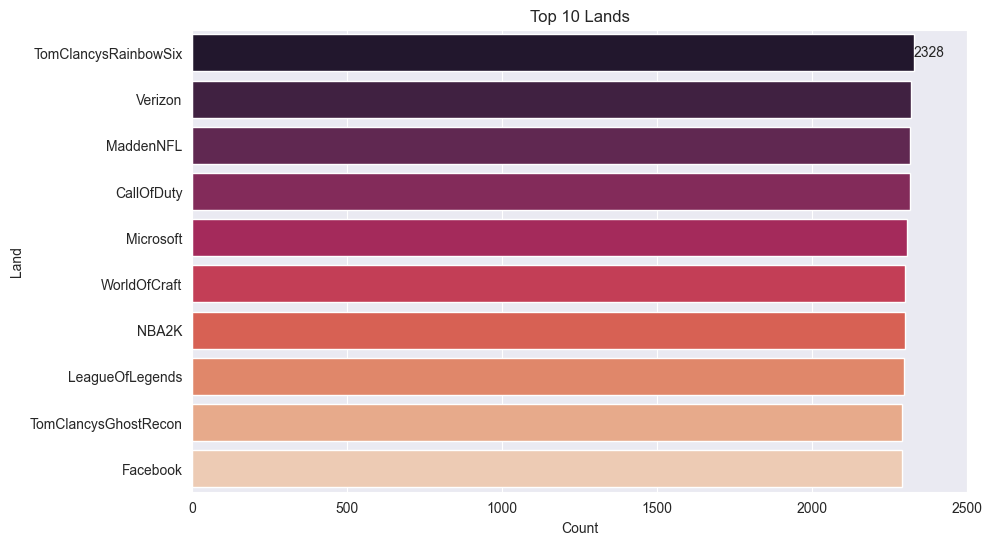

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
bar = sns.barplot(x=lands.values[:10], y=lands.index[:10], palette='rocket')
bar.bar_label(bar.containers[0])
title = 'Top 10 Lands'
plt.title(title)
plt.xlabel('Count')
plt.ylabel('Land')
plt.xlim(0, 2500)

# Save the figure with the same title name
plt.savefig(f"{output_folder_path}{title}.png")

# Display the plot
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* Mode这一列包含4种：Positive，Neutral，Negative和Irrelevant<br>
Negative的评价数量最多: 21698 <br>
Positive的排第二: 19712<br>
Neutral的排第三: 17708<br>
Irrelevant的最少: 12537<br>
* 用一个饼图来直观地显示一下所占的比例
</div>

In [18]:
print(f'The unique values of Mode : {len(df.Mode.unique())}')
print('**' * 20)
print(df.Mode.unique())

The unique values of Mode : 4
****************************************
['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [19]:
mode = df.Mode.value_counts()
mode.to_frame().T

Mode,Negative,Positive,Neutral,Irrelevant
count,21698,19712,17708,12537


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>

Negative : 30.3 % <br>
Positive : 27.5%<br>
Neutral : 24.7%<br>
Irrelevant : 17.5%<br>

</div>

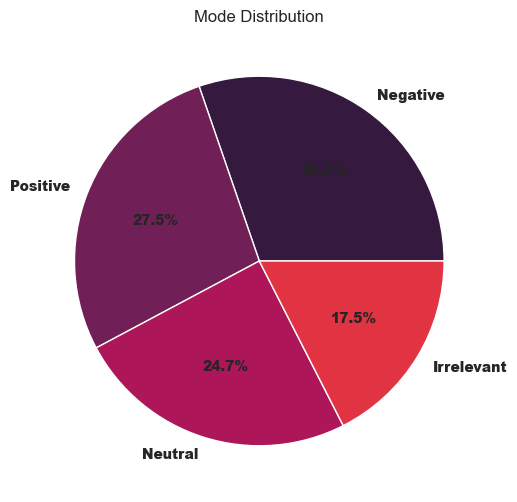

In [20]:
plt.figure(figsize=(6,6))
plt.pie(x = mode.values , labels=mode.keys() ,autopct="%1.1f%%" , 
textprops={"fontsize":10,"fontweight":"black"},colors=sns.color_palette("rocket"))
title ='Mode Distribution'
plt.title(title) 
plt.savefig(f"{output_folder_path}{title}.png")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 我们还可以分析一下每个评论对象下的情感的分布：<br>

Irrelevant : Battlefield最多，有907条；TomClancysGhostRecon最少，只有92条<br>

Negative :   MaddenNFL最多，有1665条；RedDeadRedemption(RDR)最少，只有290条<br>

Neutral :    Amazon最多，有1197条，AssassinsCreed最少，只有153条<br>

Positive :   AssassinsCreed最多，有1382条；Facebook最少，只有154条<br>


</div>

In [21]:
pd.crosstab(df.Mode , df.Land).T.style.background_gradient( subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Irrelevant'] , cmap='BuGn')


Mode,Irrelevant,Negative,Neutral,Positive
Land,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,971
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 在这里，利用re这个库，我们可以替换一些文本中的语法问题、口语化表达等... <br>
* 还可以替换或者删除推文中emoji表情，这些emoji表情对于判断人们的情感倾向至关重要 <br>
* 使用text_clear函数将连续的多个标点替换为1个标点<br>
* 最后，所有的文本都转化为小写形式<br> 

</div>

In [22]:
def clean_emoji(tx):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols 
                           u"\U0001F680-\U0001F6FF"  # transport 
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', tx)
def text_cleaner(tx):
    
    text = re.sub(r"won\'t", "would not", tx)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"Im", "I am", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\!\?\.\@]',' ' , text)
    text = re.sub(r'[!]+' , '!' , text)
    text = re.sub(r'[?]+' , '?' , text)
    text = re.sub(r'[.]+' , '.' , text)
    text = re.sub(r'[@]+' , '@' , text)
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = text.lower()
    text = re.sub(r'[ ]+' , ' ' , text)
    
    return text


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* 这里介绍几个NLP领域常见的任务<br>
首先通过random.choice选择一个样本<br>

</div>

In [23]:
random.seed(99)
test_text =text_cleaner( random.choice(df['Text']))
test_text = clean_emoji(test_text)
test_text

'ghost of tsushi ama is now graphically the best open world. red dead redemption 2 is one second ahead.'

POS => 词性（Part Of Speech）

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**POS:**<br>
词性（Part Of Speech，POS）表示单词在句子中的意义和语法功能<br>
英语中有8种词性 (noun, pronoun, verb, adjective, adverb, preposition, conjunction, and interjection)<br>
在使用词典时，理解词性对于确定单词的正确定义至关重要。

**Description**<br>
这里使用Spacy库中的特征来判断词性(nlp = spacy.load("en_core_web_sm"))<br>

</div>

In [24]:
doc = nlp(test_text)
for token in doc :
    print(f'{token} => {token.pos_}')

ghost => NOUN
of => ADP
tsushi => PROPN
ama => NOUN
is => AUX
now => ADV
graphically => ADV
the => DET
best => ADV
open => ADJ
world => NOUN
. => PUNCT
red => ADJ
dead => ADJ
redemption => NOUN
2 => NUM
is => AUX
one => NUM
second => ADJ
ahead => ADV
. => PUNCT


命名实体识别 (Named Entity Recognition)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**NER:**<br>
NER表示命名实体识别，其中，命名实体是表示真实世界对象的特定术语，如人员、组织、位置和日期等。NER用于识别、分类和提取（文本中的命名实体）非结构化文本中最重要的信息。它对于从大量数据中快速提取关键信息特别有用，因为它可以自动提取重要信息。
</div>

In [25]:
doc = nlp(test_text)
for chunk in doc.ents:
    print(f'{chunk} => {chunk.label_}')


tsushi => ORG
2 => CARDINAL
second => ORDINAL


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Chunking:**<br>
将文本转换为较小的单词以更易于理解，或者根据单词的性质将相似的单词组合在一起的过程。
如名词组，动词组等。 <br>

NP: Noun Chunks<br>
VP: Verp Chunks
</div>

In [26]:
doc = nlp(test_text)
for chunk in doc.noun_chunks:
    print(f'{chunk} => {chunk.label_}')

ghost => NP
tsushi ama => NP
the best open world => NP
red dead redemption => NP


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Tokenization :**<br>
分词（Tokenization）将文本分解成更小的部分，以便于机器分析，帮助机器理解人类语言。<br>
这些更小的部分被称作token。<br>

注意: <br>
有各种类型的分词，如：RegexpTokenizaton、TweetTokenization等。<br>
每种分词都有不同的方法将文本分解为token。<br>

**Description**<br>
这里我们使用Regexp分词，它使用正则表达式将字符串拆分为子字符串。<br>

</div>

In [27]:
# Tokenizer = TweetTokenizer()
Tokenizer=RegexpTokenizer(r'\w+')
test_text_tokenized = Tokenizer.tokenize(test_text)
test_text_tokenized

# df['Text']=df['Text'].apply(lambda x : Tokenizer.tokenize(x))

['ghost',
 'of',
 'tsushi',
 'ama',
 'is',
 'now',
 'graphically',
 'the',
 'best',
 'open',
 'world',
 'red',
 'dead',
 'redemption',
 '2',
 'is',
 'one',
 'second',
 'ahead']

 Counter vectorizer

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**CountVectorizer:**<br>
Counter Vectorizer用于将文档、文本转换为分词(token)出现频次的矢量。<br>例如，在下面的句子中，我们可以看到is已经出现了2次，而其他单词只出现了一次。<br>因此，会有一个向量来描述每个单词在句子中出现的次数。为了更好地理解，这里用一个热力图来显示。

</div>

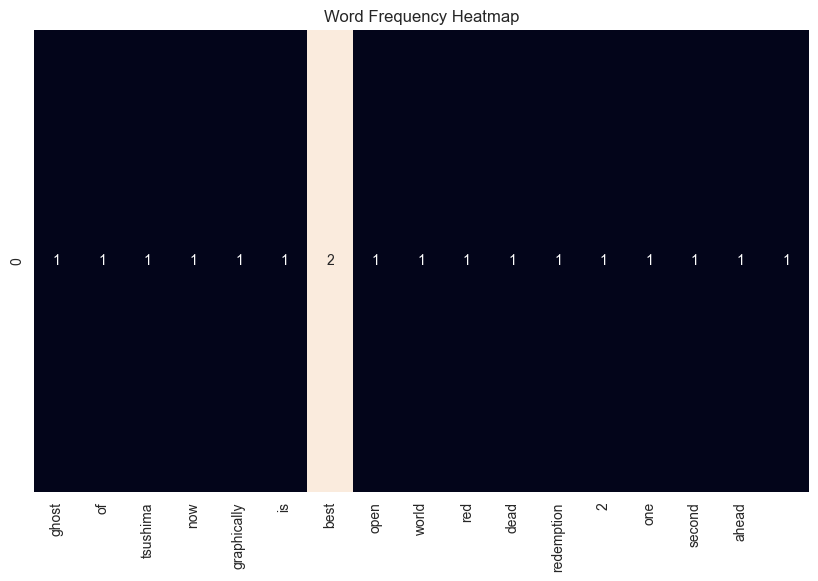

array([[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [28]:

words  = ['ghost','of','tsushima','now','graphically','is','best','open','world','red','dead','redemption','2','one','second','ahead']
counter_vectorizer = CountVectorizer()
transform = counter_vectorizer.fit_transform([test_text]).toarray()
plt.figure(figsize=(10, 6))
sns.heatmap(transform, annot=True, xticklabels=words, cbar=False)
# Title for the plot and save it
title = 'Word Frequency Heatmap'
plt.title(title)
plt.savefig(f"{output_folder_path}{title}.png")

# Display the plot
plt.show()

# Print the transformed array
transform

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**TF-IDF:**<br>
Tf_IDF：Tf-IDF由两部分组成。首先，Tf代表term frequency，表示一个单词在文档中出现的次数<br>（计算单词的数量并将其除以句子中所有单词的数量）<br>

IDF：代表反向文档频率，是指一个单词在语料库中的常见程度或一个单词的不常见程度<br>（衡量术语在语料库中所有文档中的重要性）<br>结果实际上是一个介于0和1之间的数字，它是通过将语料库中文档总数的对数除以该术语出现的文档数来计算的
</div>

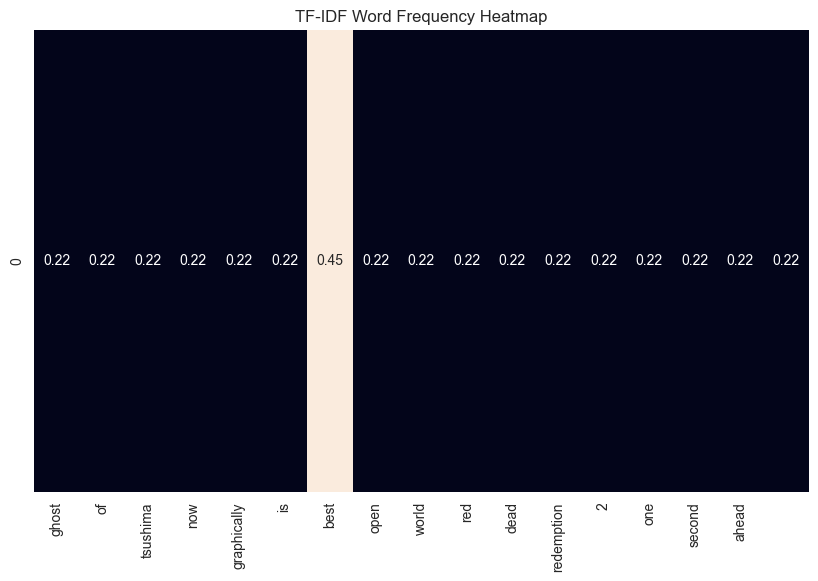

array([[0.2236068, 0.2236068, 0.2236068, 0.2236068, 0.2236068, 0.2236068,
        0.4472136, 0.2236068, 0.2236068, 0.2236068, 0.2236068, 0.2236068,
        0.2236068, 0.2236068, 0.2236068, 0.2236068, 0.2236068]])

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
words  = ['ghost','of','tsushima','now','graphically','is','best','open','world','red','dead','redemption','2','one','second','ahead']
TF_IDF = TfidfVectorizer()
transform = TF_IDF.fit_transform([test_text]).toarray()
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(transform, annot=True, xticklabels=words, cbar=False)

# Title for the plot and save it
title = 'TF-IDF Word Frequency Heatmap'
plt.title(title)
plt.savefig(f"{output_folder_path}{title}.png")

# Display the plot
plt.show()

# Print the transformed array
transform

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**N-grams:**<br>
N-gram表示N个单词的序列。文本文档中N个连续项目的集合，包括单词、数字、符号、<br>和标点符号。如果是2-gram，那么就是基于当前单词和下一个单词。3-gram，当前和后面的2个单词，以此类推。<br>

</div>

N-grams => 3-grams 

In [30]:
def n_grams(text, n):

    return [text[i:i+n] for i in range(len(text)-n+1)]
cleaned = test_text_tokenized
n_grams(cleaned, 3)


[['ghost', 'of', 'tsushi'],
 ['of', 'tsushi', 'ama'],
 ['tsushi', 'ama', 'is'],
 ['ama', 'is', 'now'],
 ['is', 'now', 'graphically'],
 ['now', 'graphically', 'the'],
 ['graphically', 'the', 'best'],
 ['the', 'best', 'open'],
 ['best', 'open', 'world'],
 ['open', 'world', 'red'],
 ['world', 'red', 'dead'],
 ['red', 'dead', 'redemption'],
 ['dead', 'redemption', '2'],
 ['redemption', '2', 'is'],
 ['2', 'is', 'one'],
 ['is', 'one', 'second'],
 ['one', 'second', 'ahead']]

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Stop words:**<br>
Stop words表示语言中非常常见的单词。在许多句子中，即使它们被删除也不会影响句子的意思<br>

NLTK库包含了NLP项目中常用的stop words。<br> 例如，英语中有179个stop words，这里展示了其中的20个。

</div>

In [31]:
os.makedirs(f'{output_folder_path}//sentiments', exist_ok=True)

In [32]:
stopwords_list = stopwords.words('english')
print(f'There are {len(stopwords_list) } stop words')
print('**' * 20 , '\n20 of them are as follows:\n')
for inx , value in enumerate(stopwords_list[:20]):
    print(f'{inx+1}:{value}')


There are 179 stop words
**************************************** 
20 of them are as follows:

1:i
2:me
3:my
4:myself
5:we
6:our
7:ours
8:ourselves
9:you
10:you're
11:you've
12:you'll
13:you'd
14:your
15:yours
16:yourself
17:yourselves
18:he
19:him
20:his


In [33]:
def make_corpus(kind):
    corpus = []
    for text in df.loc[df['Mode']==kind]['Text'].str.split():
        for word in text:
            corpus.append(word)
    return corpus

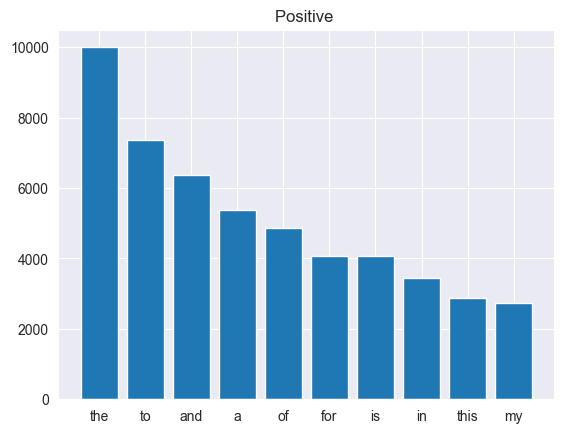

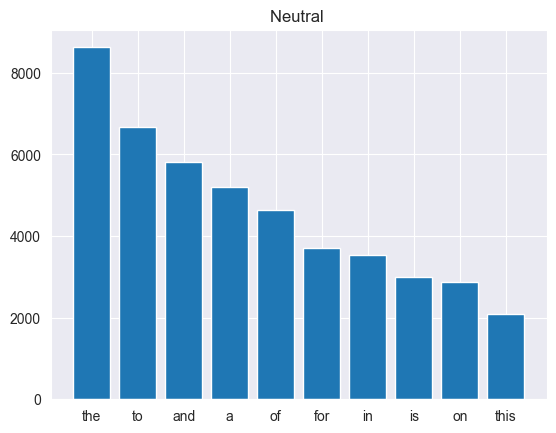

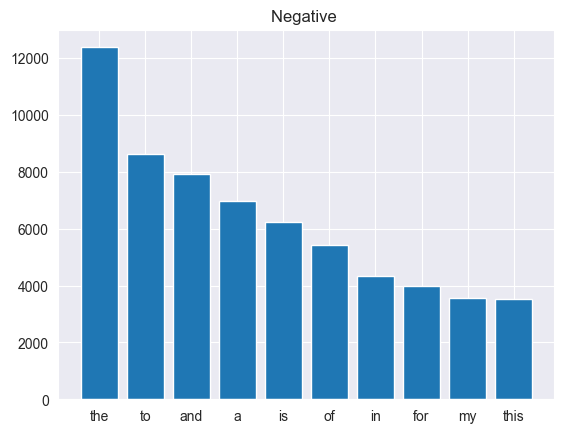

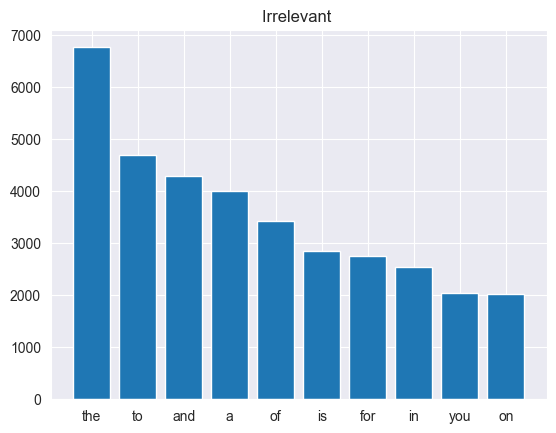

CPU times: total: 1.94 s
Wall time: 1.96 s


In [34]:
%%time
stop = stopwords.words('english')
sentiments = list(df.Mode.unique())



for inx , value in enumerate(sentiments):
    
    corpus = make_corpus(value)
    
    dic = defaultdict(int)

    for word in corpus:
        if word in stop:
            dic[word] += 1
    
    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

    x, y = zip(*top)
    title = f'{value} '
    plt.title(title)
    plt.bar(x , y)
    plt.savefig(f"{output_folder_path}//sentiments//{title}.png")
    plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
分析完数据，开始清理数据。这里用text_clearer清洗数据，然后用Tokenizer来进行分词。
</div>

In [35]:
# df['Text'] = df['Text'].apply(lambda x : clean_emoji(x))
df['Text'] = df['Text'].apply(lambda x : text_cleaner(x))
df['Text']= df['Text'].apply(lambda x : Tokenizer.tokenize(x))
df['Text'].to_frame()


,Text
0,"[i, am, coming, to, the, borders, and, i, will..."
1,"[i, am, getting, on, borderlands, and, i, will..."
2,"[i, am, coming, on, borderlands, and, i, will,..."
3,"[i, am, getting, on, borderlands, 2, and, i, w..."
4,"[i, am, getting, into, borderlands, and, i, ca..."
...,...
74676,"[just, realized, that, the, windows, partition..."
74677,"[just, realized, that, my, mac, window, partit..."
74678,"[just, realized, the, windows, partition, of, ..."
74679,"[just, realized, between, the, windows, partit..."


词根（Lemmas）和词干（Stems）

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Lemmatization :**<br>

Lemmatization可以将单词简化为词根。如动词fly，它可以有许多不同的形式，flow，flew，flies，flown，flowing等。<br>这些都可以简化为fly。<br>

**Stemming :**<br>
Stemming表示利用人为定义的规则来删除单词的结尾，以将它们缩减为词干的形式。 <br>

**二者的不同点 :**<br>
Lemmatization和Stemming之间最重要的区别是，Lemmatization更准确，它将一个单词变成该单词的语言词根，Stemming可以是任何对计算机可读但是对人类不可读（有时不可读）的东西。通常Stem生成也更快，是处理大量语料库的好方法。
</div>

In [36]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(test_text)
for token in doc :
    print(f'{token} => {token.lemma_}')

ghost => ghost
of => of
tsushi => tsushi
ama => ama
is => be
now => now
graphically => graphically
the => the
best => well
open => open
world => world
. => .
red => red
dead => dead
redemption => redemption
2 => 2
is => be
one => one
second => second
ahead => ahead
. => .


In [37]:
# lemmatizer = WordNetLemmatizer() 
Stemmer = PorterStemmer()
def stopwords_cleaner(text):
#     word = [lemmatizer.lemmatize(letter) for letter in text if letter not in stopwords_list]
    word = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
    peasting = ' '.join(word)
    return peasting
df['Text'] = df['Text'].apply(lambda x : stopwords_cleaner(x))
# stopwords_cleaner(Tokenizer.tokenize(df.Text[100]))

In [38]:
df['Text'][:10].to_frame()

,Text
0,come border kill
1,get borderland kill
2,come borderland murder
3,get borderland 2 murder
4,get borderland murder
5,spent hour make someth fun know huge borderlan...
6,spent coupl hour someth fun know huge borderla...
7,spent hour someth fun know huge borderland fan...
8,spent hour make someth fun know huge rhandlerr...
9,2010 spent hour make someth fun know huge rhan...


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**WordCloud**<br>
WordCloud是一种用于表示文本数据的可视化技术，其中每个单词的大小表示其频率或重要性。<br>

</div>

In [39]:
os.makedirs(f'{output_folder_path}//wordCloud', exist_ok=True)

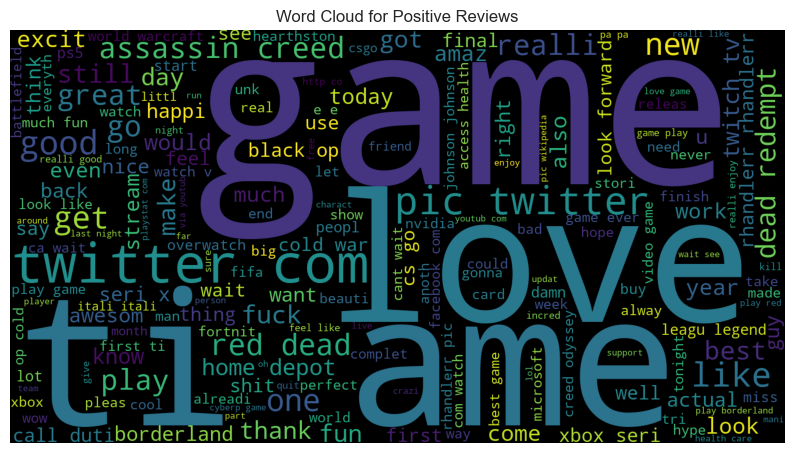

CPU times: total: 1.39 s
Wall time: 1.4 s


In [40]:
%%time
positive_reviews = df[df['Mode'] == 'Positive']['Text']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
# Title for the plot and save it
title = 'Word Cloud for Positive Reviews'
plt.title(title)
plt.axis('off')
plt.savefig(f"{output_folder_path}/wordCloud/{title}.png")
plt.show()


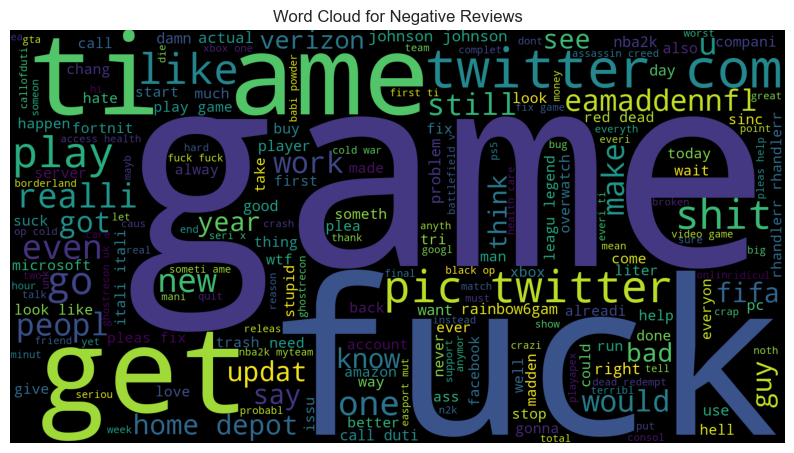

CPU times: total: 1.55 s
Wall time: 1.55 s


In [41]:
%%time
positive_reviews = df[df['Mode'] == 'Negative']['Text']
neg = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(neg)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
# Title for the plot and save it
title = 'Word Cloud for Negative Reviews'
plt.title(title)
plt.axis('off')
plt.savefig(f"{output_folder_path}/wordCloud/{title}.png")
plt.show()

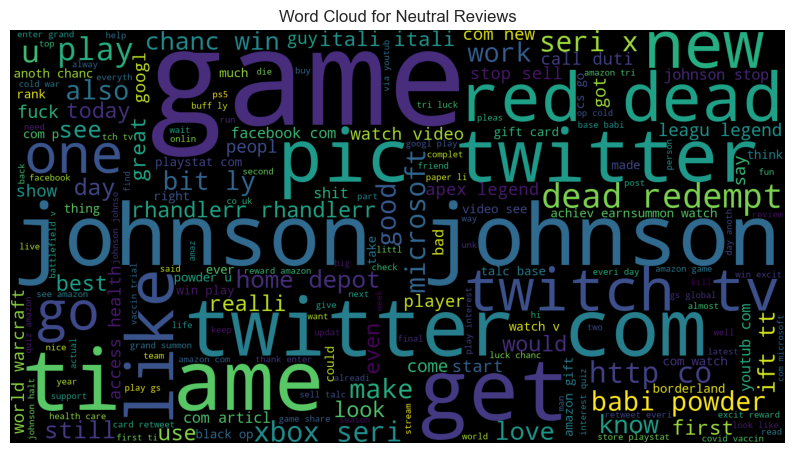

CPU times: total: 1.48 s
Wall time: 1.49 s


In [42]:
%%time
positive_reviews = df[df['Mode'] == 'Neutral']['Text']
Neutral = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(Neutral)
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
# Title for the plot and save it
title = 'Word Cloud for Neutral Reviews'
plt.title(title)
plt.axis('off')
plt.savefig(f"{output_folder_path}/wordCloud/{title}.png")
plt.show()


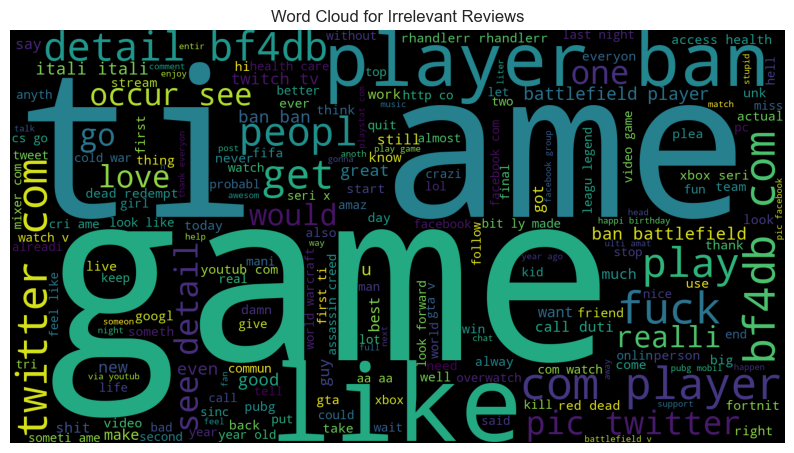

CPU times: total: 1.39 s
Wall time: 1.45 s


In [43]:
%%time
positive_reviews = df[df['Mode'] == 'Irrelevant']['Text']
Irrelevant  = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                         stopwords=stopwords_list,
                          min_font_size=15).generate(Irrelevant )
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
# Title for the plot and save it
title = 'Word Cloud for Irrelevant Reviews'
plt.title(title)
plt.axis('off')
plt.savefig(f"{output_folder_path}/wordCloud/{title}.png")
plt.show()



<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
这里统计了一下数据集中的句子的长度的信息，如长度的最大值，最小值，均值，标准差等。我们将所有的句子处理为相同的长度166。（因为Mew + 2sigma是165.7）不足166的通过PAD填充，超过的就进行截断。
</div>

In [44]:
len_text = [len(tx) for tx in df['Text'].to_list()]
print(f'Max Length : {np.max(len_text)}')
print(f'Min Length : {np.min(len_text)}')
print(f'Mean Length : {round(np.mean(len_text),2)}')
print(f'Std Length : {round(np.std(len_text),2)}')
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')


Max Length : 797
Min Length : 0
Mean Length : 67.95
Std Length : 49.2
Mew + 2sigma : 166.34


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
这里使用柱状图来显示一下不同情感类型下最常用的单词。
</div>

In [45]:
os.makedirs(f'{output_folder_path}//most_Word_used', exist_ok=True)

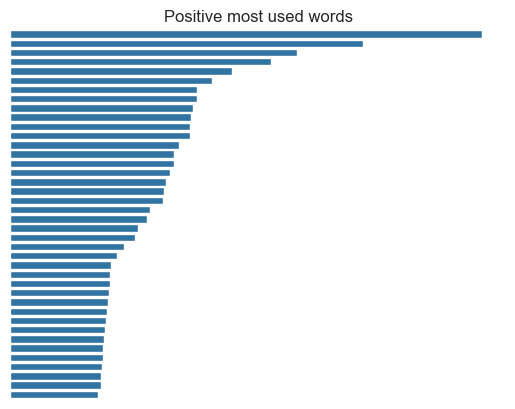

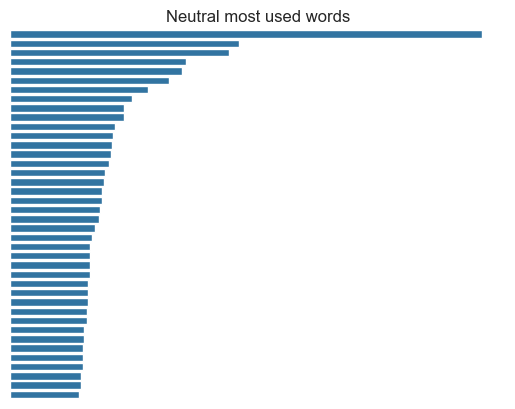

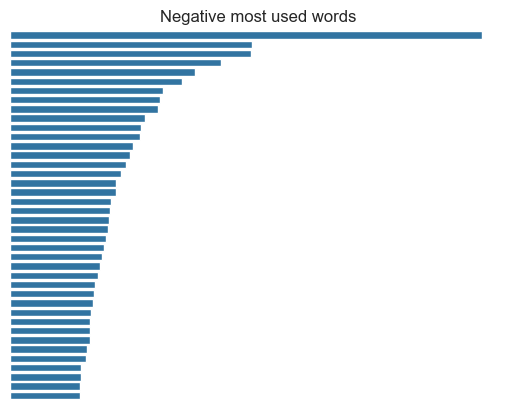

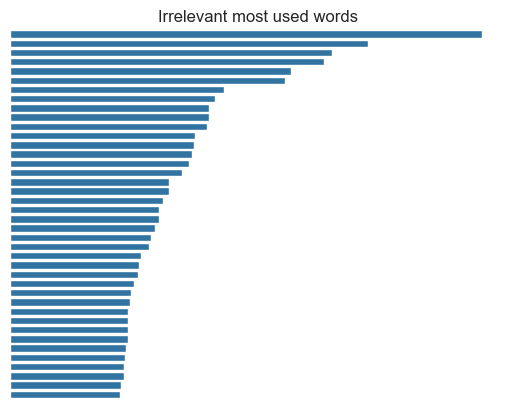

CPU times: total: 875 ms
Wall time: 876 ms


In [46]:
%%time
for inx , value in enumerate(sentiments):
    
    counter = Counter(make_corpus(value))
    most_common = counter.most_common()

    x = []
    y = []

    for word, count in most_common[:40]:
         if word not in stop:
            x.append(word)
            y.append(count)
         
    sns.barplot(x=y, y=x, orient='h')
   # Title for the plot and save it
    title = f'{value} most used words'
    plt.title(title)
    plt.axis('off')
    plt.savefig(f"{output_folder_path}//most_Word_used//{title}.png")
    plt.show()


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
为了让模型更加关注postive和negative的分类，这里将neutral和irrelevant统一赋值为2，然后positive和negative分别为1和0。
</div>

In [47]:
df['sentiments'] = df['Mode'].replace({'Positive' : 1 ,  'Negative' : 0 ,'Neutral':2 , 'Irrelevant' : 2 })

In [48]:
df.sample(10)

,Index,Land,Mode,Text,sentiments
8334,9430,Overwatch,Negative,sorri problem promis jeff report 3 pictur echo...,0
28376,484,ApexLegends,Negative,pleas playapex day 1 player game amposs play,0
56926,11366,TomClancysRainbowSix,Negative,say thought server rainbow almost hit like bar...,0
20403,12693,WorldOfCraft,Neutral,2010 us steel wow token price 80 151 057g ti a...,2
22208,4200,CS-GO,Neutral,pubg csgo overwatch cod fortnit hello ama kill...,2
61735,4984,GrandTheftAuto(GTA),Irrelevant,think hurt eont follow u,2
65440,6806,johnson&johnson,Neutral,johnson johnson,2
19488,12537,WorldOfCraft,Negative,everyon tell warcraft unlock like 5 year ago p...,0
29689,705,ApexLegends,Neutral,go check amaz mixerretweet streamer small,2
16461,9619,PlayStation5(PS5),Positive,hope xbox goe much smoother next week els soon...,1


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
这里定义一个数据集的类
</div>

In [49]:
class Dataset:
    def __init__(self,text,sentiment):
        self.text = text
        self.sentiment = sentiment
        
    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        text = self.text[item,:]
        target = self.sentiment[item]
        return {
            "text": torch.tensor(text,dtype = torch.long),
            "target": torch.tensor(target,dtype = torch.long)
        }

In [50]:
def load_vectors(fname):
    fin = open(fname , encoding="utf8")
    data = {}
    for line in fin:
        tokens = line.split()
        data[tokens[0]] = np.array([float(value) for value in tokens[1:]])
        
    return data

In [51]:
def create_embedding_matrix(word_index,embedding_dict):

    embedding_matrix = np.zeros((len(word_index)+1,300))
    for word, i in word_index.items():
        if word in embedding_dict:
            embedding_matrix[i] = embedding_dict[word]
            
    return embedding_matrix

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 模型 </b></div>

<center>
<img src="https://miro.medium.com/v2/resize:fit:764/1*6QnPUSv_t9BY9Fv8_aLb-Q.png" width=800 height=300 />
</center>

双向LSTM（BiLSTM）是一种主要用于自然语言处理的递归神经网络。与标准LSTM不同，输入双向流动，并且能够利用来自两侧的信息。它可用于对单词和短语在序列的两个方向上的顺序依赖关系进行建模。

BiLSTM又增加了一个LSTM层，这颠倒了信息流的方向。简单地说，这意味着输入序列在附加的LSTM层中反向流动。

In [52]:
class sentimentBiLSTM(nn.Module):
#inherited from nn.Module
    
    def __init__(self, embedding_matrix, hidden_dim, output_size):
      
        #initializing the params by initialization method 
        super(sentimentBiLSTM, self).__init__()
        self.embedding_matrix = embedding_matrix
        self.hidden_dim = hidden_dim
        num_words = self.embedding_matrix.shape[0]
        embed_dim = self.embedding_matrix.shape[1]
        # craetinh embedding layer
        self.embedding = nn.Embedding(num_embeddings=num_words,embedding_dim=embed_dim)
        
        ## initializes the weights of the embedding layer to the pretrained embeddings in 
        ## embedding_matrix. It first converts embedding_matrix to a PyTorch tensor and 
        ## wraps it in an nn.Parameter object, which makes it a learnable parameter of the model.
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix,dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_dim,hidden_dim,bidirectional=True,batch_first=True)

        #it is multuplied by 2 becuase it is bi_directional if one-sided it didnt need.
        self.fc = nn.Linear(hidden_dim*2, output_size)
        

    #we need a forward function to model calculate the cost and know how bad the params is .  
    # However , it can be written in a line of code but if we want to track it it is easier way.  
    def forward(self, x):

       
        embeds = self.embedding(x)
        lstm_out,_ = self.lstm(embeds)
        lstm_out = lstm_out[:, -1]
        out = self.fc(lstm_out)

        return out

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
将数据集拆分为80%用于训练，20%用于测试。
</div>

In [53]:
y = df.sentiments.values
train_df,test_df = train_test_split(df,test_size = 0.2, stratify = y)

In [54]:
MAX_LEN = 167
BATCH_SIZE = 32
hidden_dim = 64
output_size = 3


if torch.cuda.is_available():
    
       device = torch.device("cuda")
   
else:
       device = torch.device("cpu")
    

print(f'Current device is {device}')


Current device is cpu


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
现在，我们需要将每个样本转换为可读的方式，删除所有超过167的多余单词，并放入PAD字符<br>我们使用texts_to_sequences函数来完成这一操作。然后使用DataLoader来读取Train和Test的数据。
</div>

In [55]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df.Text.values.tolist())

xtrain = tokenizer.texts_to_sequences(train_df.Text.values)
xtest = tokenizer.texts_to_sequences(test_df.Text.values)
xtrain = tf.keras.preprocessing.sequence.pad_sequences(xtrain,maxlen = MAX_LEN)
xtest = tf.keras.preprocessing.sequence.pad_sequences(xtest,maxlen = MAX_LEN)
train_dataset = Dataset(text=xtrain,sentiment=train_df.sentiments.values)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=BATCH_SIZE,drop_last=True)
valid_dataset = Dataset(text=xtest,sentiment=test_df.sentiments.values)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size=BATCH_SIZE,drop_last=True)


In [56]:
# check a batch of data 
one_batch = next(iter(train_loader))
one_batch

{'text': tensor([[   0,    0,    0,  ...,    0, 2853, 6881],
         [   0,    0,    0,  ...,   66,  131,  527],
         [   0,    0,    0,  ...,   71, 4012, 2338],
         ...,
         [   0,    0,    0,  ..., 1263, 1336,  353],
         [   0,    0,    0,  ...,  220,   15,  943],
         [   0,    0,    0,  ...,  358,  813, 1695]]),
 'target': tensor([0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0,
         2, 2, 2, 2, 2, 2, 2, 1])}

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
这里将每个数据中的word替换为word vector，使用的是glove.6B.300d的词向量。
</div>

In [57]:

NLP_FOLDER = os.getenv('NLP_PATH')
GloveFIle = os.path.join(NLP_FOLDER+'glove.6B.300d.txt')
embedding_dict = load_vectors(GloveFIle)
embedding_matrix = create_embedding_matrix(tokenizer.word_index,embedding_dict)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
实例化模型。这里可以看到词典中共有23595个单词，每个单词的词向量是300维的。

</div>

In [58]:
MODELS_FOLDER = os.getenv('MODEL_FOLDER_PATH')
model_folder_path= MODELS_FOLDER
OUR_BI_LSTM_MODEL_File = os.path.join(model_folder_path+'our_BI_LSTM_model.pth')
LOAD_MODEL_FILE = OUR_BI_LSTM_MODEL_File
LOAD_FILE= False

In [59]:
# 实例化模型
model = sentimentBiLSTM(embedding_matrix,hidden_dim,output_size)
model = model.to(device)
print(model)

sentimentBiLSTM(
  (embedding): Embedding(23571, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)


In [60]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# 实例化优化器
optimizer = optim.Adam(model.parameters()) 

criterion = nn.CrossEntropyLoss() 

def acc(pred,label):
    pred = pred.argmax(1)
    return torch.sum(pred == label.squeeze()).item()

In [61]:
clip = 5
epochs = 20
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    # for getting loss and accuracy for train
    train_losses = []
    train_acc = 0.0

    #put model on train mode
    model.train()
    correct = 0

    # initialize hidden state 
    for data in train_loader:  

        #get text and target 
        inputs = data['text']
        labels = data['target']

        #put them on GPU and right dtypes
        inputs = inputs.to(device,dtype=torch.long)
        labels = labels.to(device,dtype=torch.float)
   # 模型参数的梯度清零
        optimizer.zero_grad()  # Zero gradients before backpropagation

        # 获取模型输出
        output = model(inputs)  # Pass the inputs through the model

        # 计算loss
        loss = criterion(output, labels.long())  # Calculate the loss

        # loss反向传播
        loss.backward()  # Backpropagate the loss to update model weights

    
        train_losses.append(loss.item())
        # accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in LSTMs
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()  # Update model weights based on calculated gradients
        
    # for getting loss and accuracy for valiadtion
    val_losses = []
    val_acc = 0.0

    #put model on evaluation mode
    model.eval()
    for data in valid_loader:

        #get text and target 
        inputs = data['text']
        labels = data['target']

        #put them on GPU and right dtypes
        inputs = inputs.to(device,dtype=torch.long)
        labels = labels.to(device,dtype=torch.float)

        #gradient becomes zero=> avoid accumulating 
        model.zero_grad()
        output = model(inputs)

        output = model(inputs)
        #Loss calculating 
        val_loss = criterion(output, labels.long())
        #append Loss to the above list
        val_losses.append(val_loss.item())

        # calculating accuracy 
        accuracy = acc(output,labels)
        val_acc += accuracy
        epoch_train_loss = np.mean(train_losses)

        #using schedule lr if you need
#         schedul_learning.step()
#         schedul_learning

    #appending all accuracy and loss to the above lists and variables
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        #each time that model(params) get better you can save the model(you have to enter a path ou you pc and save with pt file)
        torch.save(model.state_dict(), LOAD_MODEL_FILE)
#         print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        print(f'Validation loss decreased ({valid_loss_min} --> {epoch_val_loss})  Saving model ...')
        # save model if better result happends
        valid_loss_min = epoch_val_loss
    print(30 * '==' , '>')

Epoch 1
train_loss : 0.8592529862636564 val_loss : 0.7719382489687644
train_accuracy : 59.317214430256094 val_accuracy : 64.86637359570162
Validation loss decreased (inf --> 0.7719382489687644)  Saving model ...
============================================================ >
Epoch 2
train_loss : 0.6783899328749916 val_loss : 0.6519248561571108
train_accuracy : 70.42425511129719 val_accuracy : 71.63491731212058
Validation loss decreased (0.7719382489687644 --> 0.6519248561571108)  Saving model ...
============================================================ >
Epoch 3
train_loss : 0.5302054483686859 val_loss : 0.5757655348687097
train_accuracy : 77.94815435070825 val_accuracy : 76.18449515037332
Validation loss decreased (0.6519248561571108 --> 0.5757655348687097)  Saving model ...
============================================================ >
Epoch 4
train_loss : 0.4203441745696755 val_loss : 0.5329210707871973
train_accuracy : 83.15888633033285 val_accuracy : 78.33368222733932
Validatio

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Descripton**<br>
    
The result after 10 epochs is :<br>
    
train_accuracy : 92.44121135998884 <br>
val_accuracy : 82.91117158607216<br>
    
train_loss : 0.18834395279212413<br>
val_loss : 0.5528476672784594<br>  

 
Lets plot it for better understanding =>
</div>

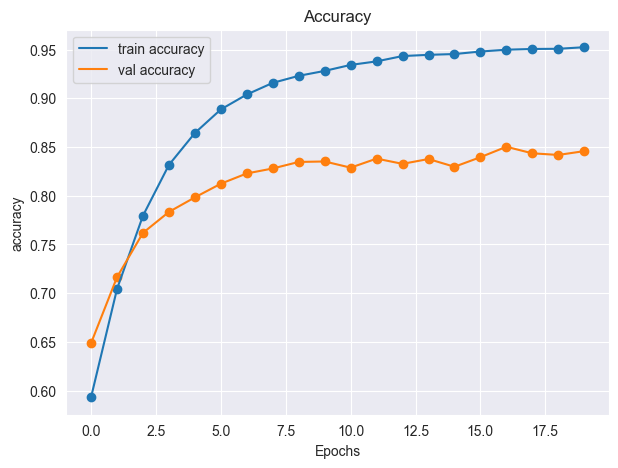

In [62]:
plt.figure(figsize=(7, 5))
plt.plot(range(0,epochs), epoch_tr_acc, label='train accuracy')
plt.scatter(range(0, epochs), epoch_tr_acc)
plt.plot(range(0, epochs), epoch_vl_acc, label='val accuracy')
plt.scatter(range(0, epochs), epoch_vl_acc)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
# Title for the plot and save it
title = 'Accuracy'
plt.title(title)
plt.savefig(f"{output_folder_path}{title}.png")
plt.show()

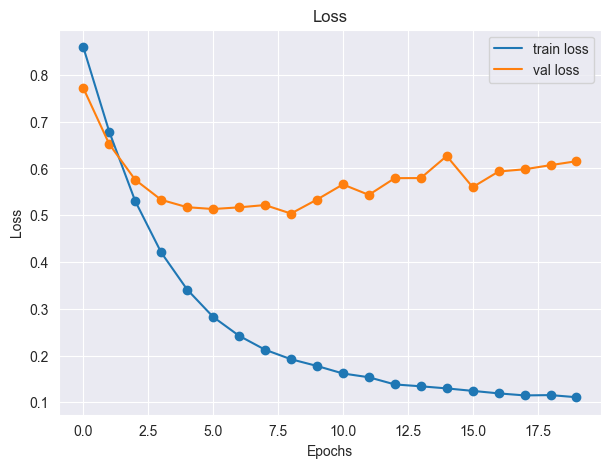

In [63]:
plt.figure(figsize=(7,5))
plt.plot(range(0,epochs),epoch_tr_loss , label='train loss')
plt.scatter(range(0,epochs),epoch_tr_loss )
plt.plot(range(0,epochs),epoch_vl_loss , label='val loss')
plt.scatter(range(0,epochs),epoch_vl_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Title for the plot and save it
title = 'Loss'
plt.title(title)
plt.savefig(f"{output_folder_path}{title}.png")
plt.show()